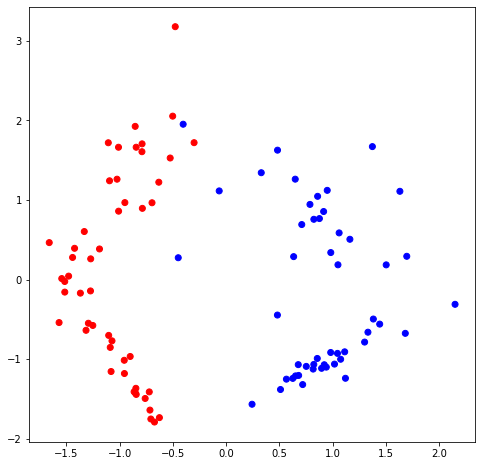

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [5]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [7]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    # Задание 1. Защита от некорретных значений А. Это задание у меня не получилось сделать...
    
#     if A == 0:
#         A += 0.000001
#         loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
#         loss = np.squeeze(loss)
        
#         grad = 1.0 / m * np.dot(X, (A - y).T)
        
#     else:
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
        
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
#     print('loss:', loss, 'grad:', grad)
    
    return loss, grad

In [6]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [8]:
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

### Задание 2

In [9]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

# For 2 task
# Параметры подобрал. Текущие значения оптимальны, поскольку 
# увеличение числа итераций гораздо сильнее расходует ресурсы, чем уменьшает loss

n_iterations = 20000
eta = 0.01

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
print(f"Значение loss: {losses[-1]:.3f}")

Итоговый вектор весов w: [[5.10533474]
 [0.50967285]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667
Значение loss: 0.057


### Задание 3

In [11]:
n_iterations = 20000
eta = 0.01

w, losses = optimize(w, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_train = predict(w, X_train_tr)
y_predicted_test = predict(w, X_test_tr)

def calc_pred_proba(x,y,z,w):
    # В качестве меры точности возьмем долю правильных ответов
    train_accuracy = 100.0 - np.mean(np.abs(x - y)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(z - w)*100.0)
    return train_accuracy, test_accuracy

calc_pred_proba(y_predicted_train, y_train_tr, y_predicted_test, y_test_tr)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
print(f"Значение loss: {losses[-1]:.3f}")

Итоговый вектор весов w: [[5.93739715]
 [0.77599489]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667
Значение loss: 0.054


### Задание 4

In [12]:
n_iterations = 20000
eta = 0.01

w, losses = optimize(w, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_train = predict(w, X_train_tr)
y_predicted_test = predict(w, X_test_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)


a = y_predicted_test
b = y_predicted_train

# print(y_predicted_test)

def calc_pred(x):
    if (x<0.5).sum() > (x>0.5).sum():
        print('Предсказан класс 0, количество: ', (x<0.5).sum(), 'из', (x<0.5).sum() + (x>0.5).sum())
    elif (x<0.5).sum() < (x>0.5).sum():
        print('Предсказан класс 1, количество: ', (x>0.5).sum(), 'из', (x<0.5).sum() + (x>0.5).sum())
    else:
        print('Предсказаны классы 1 и 0 с одинаковой вероятностью, всего экземпляров 1 и 2 классов ', (x<0.5).sum() + (x>0.5).sum())

print('Классы на тестовой выборке')
calc_pred(a)

print('Классы на тренировочной выборке')
calc_pred(b)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
print(f"Значение loss: {losses[-1]:.3f}")

Классы на тестовой выборке
Предсказаны классы 1 и 0 с одинаковой вероятностью, всего экземпляров 1 и 2 классов  30
Классы на тренировочной выборке
Предсказан класс 0, количество:  37 из 70
Итоговый вектор весов w: [[6.08215945]
 [0.82698624]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667
Значение loss: 0.054


In [13]:
a1 = []
b1 = []
for i in  a[0]:
    a1.append(i)
for i in y_test_tr[0]:
    b1.append(i)

### Матрица ошибок

In [14]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(b1, a1).ravel()
(tn, fp, fn, tp)
print('----------------------')
print('          y=+1 |  y=-1')
print('----------------------')
print(f'a(x)=+1 |  {tp}  |  {fp} ')
print(f'a(x)=-1 |  {fn}   |  {tn} ')

----------------------
          y=+1 |  y=-1
----------------------
a(x)=+1 |  15  |  0 
a(x)=-1 |  1   |  14 


### Точность и полнота

In [15]:
pr = tp/(tp+fp)
re = tp/(tp+fn)
print(f'precision(a,X)={pr:.3f}')
print(f'recall(a,X)={re:.3f}')

precision(a,X)=1.000
recall(a,X)=0.938


### f1 score

In [16]:
f1_score = 2*pr*re/(pr+re)
print(f'f1_score={f1_score:.3f}')

f1_score=0.968


### Вывод: да, модель переобучилась. Потому что увеличиваются значения весов с каждым разом после того,
### как мы начали использовать не 0 веса, а тек, которые были изначально посчитала модель. 
### Сейчас как раз время использовать L1 и L2 регуляризацию

In [37]:
def optimize(w, X, y, n_iterations, eta, lmbd):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad + lmbd*np.sign(w)

        losses.append(loss)
        
    return w, losses

def eval_model_l1(x, y):

    n_iterations = 20000
    eta = 0.01
    lmbd = 0.0001
    
    # x - w, y - losses 
    
    x, y = optimize(w, X_train_tr, y_train_tr, n_iterations, eta, lmbd)

    y_predicted_train = predict(w, X_train_tr)
    y_predicted_test = predict(w, X_test_tr)

eval_model_l1(w, losses)

def calc_pred_proba(x,y,z,w):
    # В качестве меры точности возьмем долю правильных ответов
    train_accuracy = 100.0 - np.mean(np.abs(x - y)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(z - w)*100.0)
    return train_accuracy, test_accuracy

calc_pred_proba(y_predicted_train, y_train_tr, y_predicted_test, y_test_tr)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
print(f"Значение loss: {losses[-1]:.3f}")

Итоговый вектор весов w: [[6.08215945]
 [0.82698624]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667
Значение loss: 0.054


In [40]:
def optimize1(w, X, y, n_iterations, eta, lmbd1):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad + 2*lmbd1 * w

        losses.append(loss)
        
    return w, losses

def eval_model_l2(x, y):

    n_iterations = 20000
    eta = 0.01
    lmbd1 = 1e-50
    
    # x - w, y - losses 
    
    x, y = optimize1(w, X_train_tr, y_train_tr, n_iterations, eta, lmbd1)

    y_predicted_train = predict(w, X_train_tr)
    y_predicted_test = predict(w, X_test_tr)

eval_model_l2(w, losses)

def calc_pred_proba(x,y,z,w):
    # В качестве меры точности возьмем долю правильных ответов
    train_accuracy = 100.0 - np.mean(np.abs(x - y)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(z - w)*100.0)
    return train_accuracy, test_accuracy

calc_pred_proba(y_predicted_train, y_train_tr, y_predicted_test, y_test_tr)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")
print(f"Значение loss: {losses[-1]:.3f}")

Итоговый вектор весов w: [[6.08215945]
 [0.82698624]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667
Значение loss: 0.054
